# <div style="text-align: center; color: cyan">Work with image</div>

## <div style="text-align: center; color: lime">Imports</div>

In [37]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision.datasets import MNIST, ImageFolder
from torchvision import transforms

from matplotlib import pyplot as plt
import numpy as np

import kagglehub
from pathlib import Path

## <div style="text-align: center; color: lime">Load a dataset</div>

In [2]:
train_data = MNIST("data/", train=True, download=True)
test_data = MNIST("data/", train=False, download=True)

In [3]:
isinstance(train_data, Dataset)

True

In [4]:
print(f"train_data's size: {len(train_data)}")
print(f"test_data's size: {len(test_data)}")

train_data's size: 60000
test_data's size: 10000


5


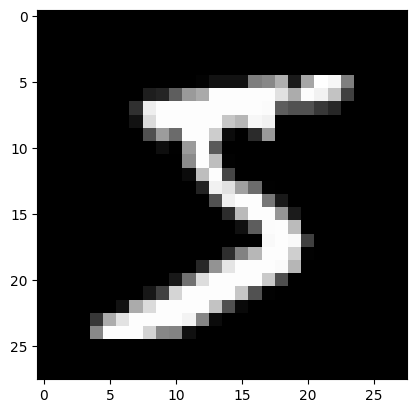

In [5]:
for image, label in train_data:
    plt.imshow(image, cmap="gray")
    print(label)
    break

## <div style="text-align: center; color: lime">Transforms</div>

In [6]:
# -------------------[ Define Dataset ]-------------------
class IRISDataset(Dataset):
    def __init__(self, data, target):
        super().__init__()
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = torch.tensor(self.data[idx]).to(torch.float)
        target = torch.tensor(self.target[idx])
        return data, target


In [7]:
train_data = MNIST("data/", train=True, download=True, transform=transforms.ToTensor())
test_data = MNIST("data/", train=False, download=True, transform=transforms.ToTensor())

In [8]:
for image, label in train_data:
    print(type(image))
    print(label)
    break

<class 'torch.Tensor'>
5


## <div style="text-align: center; color: lime">Train, validation, and test</div>

In [9]:
g1 = torch.Generator().manual_seed(20)
val_data, test_data = random_split(test_data, [0.7, 0.3], g1)

In [10]:
print(f"val_data's size: {len(val_data)}")
print(f"test_data's size: {len(test_data)}")

val_data's size: 7000
test_data's size: 3000


In [11]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

## <div style="text-align: center; color: lime">Image Folder</div>

In [19]:
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")
path = Path(path) / "tom_and_jerry/tom_and_jerry"

In [21]:
for x in path.iterdir():
    print(x.name)

tom
jerry
tom_jerry_1
tom_jerry_0


In [42]:
tom_and_jerry_transforms = transforms.Compose([transforms.Resize([90, 160]), transforms.ToTensor()])

all_data = ImageFolder(path, transform=tom_and_jerry_transforms)

0


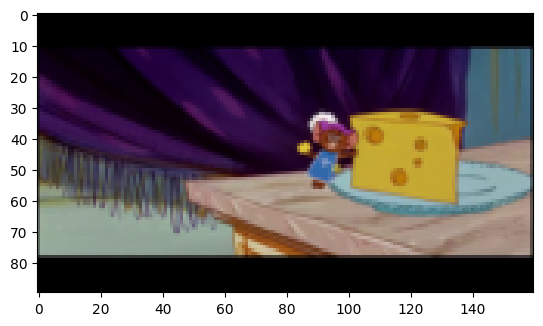

In [46]:
for image, label in all_data:
    plt.figure()
    plt.imshow(transforms.ToPILImage()(image))
    print(label)
    break

In [ ]:
g1 = torch.Generator().manual_seed(20)
train_data, val_data, test_data = random_split(all_data, [0.7, 0.2, 0.1], g1)

In [47]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

<div style="text-align: center">

<div>
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</div>

<a style="margin: 1em" href="https://literallytheone.github.io">
https://literallytheone.github.io
</a>

</div>
